# New Dataset

Let's try out our classifier on a different dataset (found on Kaggle) to determine whether our first dataset had ay bias and if the classifier is still effective on this new dataset.

In [1]:
# Read in our new dataset. Dataset consists of two files, one for fake news and one for true news.

import pandas as pd

df_fake = pd.read_csv('Fake.csv')
df_real = pd.read_csv('True.csv')

In [2]:
# Binary classification, 0 for fake and 1 for real.

df_fake['label'] = 0
df_real['label'] = 1

In [3]:
# Combining into one dataframe.

df = pd.concat([df_fake, df_real])
df = df.reset_index()
df = df.drop(df.columns[0],axis=1)
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


Now for a bit of analysis on our new dataset. This dataset has two extra features compared to our previous dataset; subject and date.

In [4]:
year_counts = {}
for date in df['date']:
    year = date[-5:]
    if year in year_counts:
        year_counts[year] += 1
    else:
        year_counts[year] = 1
year_counts    

{' 2017': 9203,
 ' 2016': 11754,
 'eb-18': 35,
 'dier/': 1,
 ' 2015': 2479,
 '-pie/': 1,
 'left/': 1,
 't.jpg': 3,
 'd.jpg': 3,
 'ideo]': 1,
 '2017 ': 16701,
 '2016 ': 4716}

In [5]:
print('Number of articles from 2015: {} ({}%)'.format(2479,round(2479/len(df)*100,3)))
print('Number of articles from 2016: {} ({}%)'.format(11754+4716,round((11754+4716)/len(df)*100,3)))
print('Number of articles from 2017: {} ({}%)'.format(9203+16701,round((9203+16701)/len(df)*100,3)))
print('Number of articles from 2018: {} ({}%)'.format(35,round(35/len(df)*100,3)))

Number of articles from 2015: 2479 (5.521%)
Number of articles from 2016: 16470 (36.683%)
Number of articles from 2017: 25904 (57.695%)
Number of articles from 2018: 35 (0.078%)


So we see that the majority of articles in our dataset are from 2016 and 2017.

In [6]:
df['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

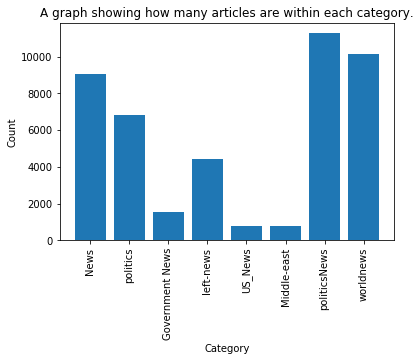

In [8]:
import matplotlib.pyplot as plt
from collections import Counter
subject_counts = Counter(df['subject'])
plt.bar(subject_counts.keys(),subject_counts.values())
plt.title('A graph showing how many articles are within each category.')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

It doesn't seem that these categories are going to be particularly useful in the classification of our news articles, so we shall not use them in our classifier.

## Data pre-processing

We are now going to pre-process the data into a format which we can then input into a machine learning classification algorithm.

In [9]:
# Combining the title and text into one column.

df['news'] = df['title'] + ' ' + df['text']

## Text pre-processing

Time to pre-process our text. We can use the same code as for the original dataset. However as this dataset is much larger it takes longer to complete the text pre-processing ( $\approx20$ minutes).

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re

# Creating a list of stopwords (common words which are not important to the overall meaning of the article).
stop_words = stopwords.words('english')
stop_words.extend(['the','it','in'])

# Lemmatization is the process of reducing words to their basic form, e.g. dogs->dog, running->run.
WNL = WordNetLemmatizer()

# We now iterate through each article in the dataset.
for index, row in df.iterrows():
    filtered_article = ''
    article = row['news']
    # Removing all punctuation using RegEx.
    article = re.sub(r'[^\w\s]', '', article)
    # Tokenization: changing the article from one continuous string to a list of tokens (words).
    words = [word.lower() for word in nltk.word_tokenize(article)]
    # Removing stopwords.
    words = [word for word in words if not word in stop_words]
    # Lemmatization and concatenating the words back into a single string.
    words_lemmatized = []
    for word in words:
        if word == 'us':
            words_lemmatized.append(word)
        else:
            words_lemmatized.append(WNL.lemmatize(word))
    filtered_article = " ".join([word for word in words_lemmatized])
    
    # Replace the article with the new filtered version.
    df.loc[index, 'news'] = filtered_article
    
df.head()

,title,text,subject,date,label,news
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump sends embarrassing new year eve m...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,sheriff david clarke becomes internet joke thr...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,trump obsessed even obamas name coded website ...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope francis called donald trump christmas spe...


## Vectorization

We are going to use the same tf-idf vectorizer as for the original dataset.

In [14]:
# First let's split our dataframe into an input and output list. Our corpus to vectorize is df_input.
df_input = df['news']
df_output = df['label']

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(df_input)
tf_idf_matrix

<44898x222161 sparse matrix of type '<class 'numpy.float64'>'
	with 7365813 stored elements in Compressed Sparse Row format>